<a href="https://colab.research.google.com/github/prodigioharshit/Anomaly-Detection/blob/main/Problem_Statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive')

Mounted at /content/drive


#Import all required Libraries


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import random
from scipy.stats import norm
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

#Read csv file into data dataframe

In [ ]:
data = pd.read_csv("latency_ship_vsat_10k.csv")
data

,Unnamed: 0,timestamp,Terminal,Latency
0,0,01/10/2021 00:36,MY-StaySalty,384.574850
1,1,01/10/2021 00:55,MY-Abydos,49.141673
2,2,01/10/2021 01:09,Marjorie-c,438.901059
3,3,01/10/2021 01:27,MY-StaySalty,504.779906
4,4,01/10/2021 01:43,MY-Namaste,531.534196
...,...,...,...,...
9994,9994,21/01/2022 22:34,MY-FountainHead1,393.321152
9995,9995,21/01/2022 22:51,MY-StaySalty,513.243977
9996,9996,21/01/2022 23:05,MY-StaySalty,621.389746
9997,9997,21/01/2022 23:15,MY-StaySalty,454.510787


#Drop the first column as they are not contributing to EDA

In [ ]:
data.drop(data.columns[[0]], axis = 1,inplace=True)
data

,timestamp,Terminal,Latency
0,01-10-2021 00:36,MY-StaySalty,384.574850
1,01-10-2021 00:55,MY-Abydos,49.141673
2,01-10-2021 01:09,Marjorie-c,438.901059
3,01-10-2021 01:27,MY-StaySalty,504.779906
4,01-10-2021 01:43,MY-Namaste,531.534196
...,...,...,...
9994,21-01-2022 22:34,MY-FountainHead1,393.321152
9995,21-01-2022 22:51,MY-StaySalty,513.243977
9996,21-01-2022 23:05,MY-StaySalty,621.389746
9997,21-01-2022 23:15,MY-StaySalty,454.510787


In [ ]:
data[data['Latency'] < 0]

,Terminal,Latency,date,time
48,MY-Namaste,-69.521062,01-10-2021,10:01
486,MY-StaySalty,-35.682743,06-10-2021,10:55
832,Marjorie-c,-152.202896,10-10-2021,12:49
1035,MY-Namaste,-16.719473,12-10-2021,19:36
1421,MY-Namaste,-56.329453,17-10-2021,05:37
1434,MY-FountainHead1,-17.629410,17-10-2021,09:13
1505,Marjorie-c,-136.475038,18-10-2021,05:00
2067,MY-Namaste,-14.761923,24-10-2021,10:56
2227,MY-FountainHead1,-75.425498,26-10-2021,02:15
2567,Marjorie-c,-72.204373,29-10-2021,14:41


# Split timestamp into date and time column

In [ ]:
data['date'] = data['timestamp'].apply(lambda x : x.split(' ')[0])
data['time'] = data['timestamp'].apply(lambda x : x.split(' ')[1])

data.drop('timestamp',axis=1,inplace=True)

data.head()

,Terminal,Latency,date,time
0,MY-StaySalty,384.574850,01-10-2021,00:36
1,MY-Abydos,49.141673,01-10-2021,00:55
2,Marjorie-c,438.901059,01-10-2021,01:09
3,MY-StaySalty,504.779906,01-10-2021,01:27
4,MY-Namaste,531.534196,01-10-2021,01:43


#Checking for any null values

In [ ]:
data.isnull().sum()

Terminal    0
Latency     0
date        0
time        0
dtype: int64

# Checking for duplicate values

In [ ]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 4)


# Calculating mean, std etc of Latency in DataFrame

In [ ]:
data.Latency.describe()

count    9999.000000
mean      592.573324
std       213.243001
min      -152.202896
25%       448.358339
50%       585.724256
75%       730.494432
max      1595.582465
Name: Latency, dtype: float64

In [ ]:
data.groupby('Terminal').describe()

Latency              ...                         
                   count        mean  ...         75%          max
Terminal                              ...                         
MY-Abydos         1682.0  592.688297  ...  731.856405  1595.582465
MY-Alegria        1653.0  592.681531  ...  737.700137  1503.578289
MY-FountainHead1  1684.0  599.009689  ...  736.009220  1385.950686
MY-Namaste        1699.0  593.002935  ...  733.621792  1391.318909
MY-StaySalty      1681.0  591.394373  ...  722.649559  1368.251127
Marjorie-c        1600.0  586.348836  ...  719.769407  1344.760972

[6 rows x 8 columns]

# Calculating Percent distribution of dataset among the Terminals

In [ ]:
data['Terminal'].value_counts(normalize=True)

MY-Namaste          0.169917
MY-FountainHead1    0.168417
MY-Abydos           0.168217
MY-StaySalty        0.168117
MY-Alegria          0.165317
Marjorie-c          0.160016
Name: Terminal, dtype: float64

#Group by all Terminals and find mean and median of each

In [ ]:
data.groupby('Terminal')['Latency'].agg(['mean','median'])

,mean,median
Terminal,,
MY-Abydos,592.688297,579.998139
MY-Alegria,592.681531,587.284145
MY-FountainHead1,599.009689,585.937304
MY-Namaste,593.002935,590.285305
MY-StaySalty,591.394373,584.802902
Marjorie-c,586.348836,584.803141


# Histograms for each terminal present in data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fddf42643d0>,
      dtype=object)

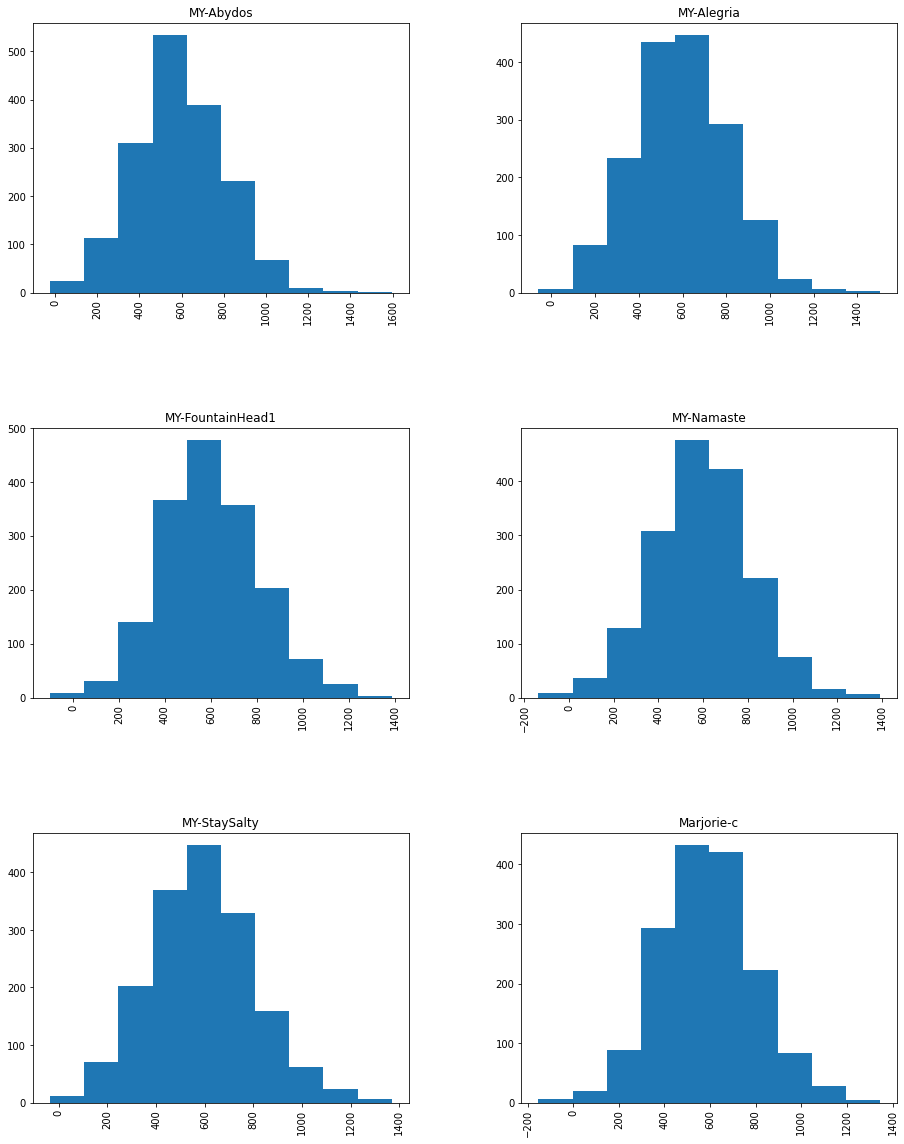

In [ ]:
data.Latency.hist(by=data.Terminal, figsize=(15,20))


# Density Plots for each Terminal

In [ ]:
def unique(list1):
    x = np.array(list1)
    return (np.unique(x))

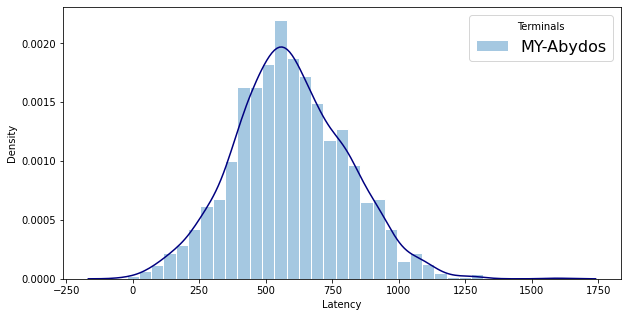

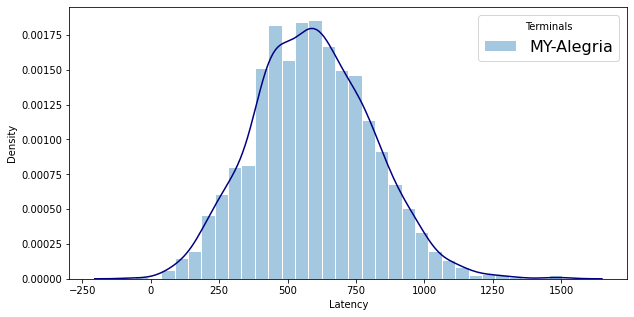

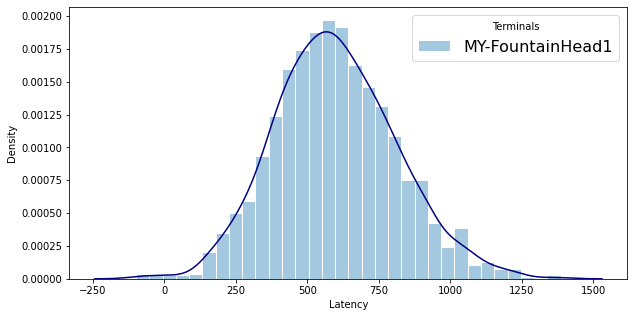

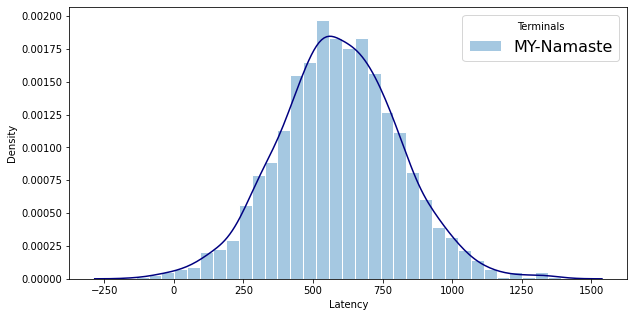

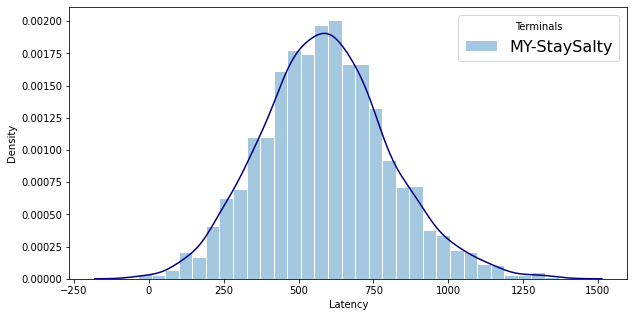

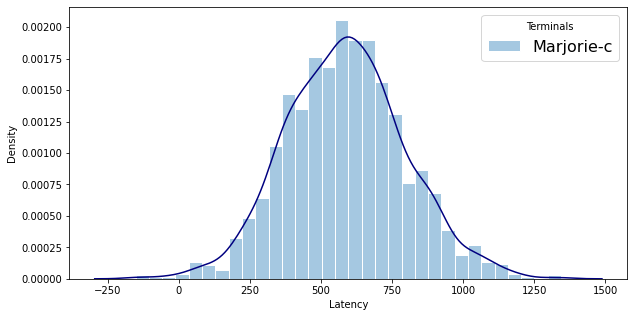

In [ ]:
terminals_list = unique(data['Terminal'].tolist())
# Iterate through the 6 terminals
for terminal in terminals_list:
    # Subset to the terminal
    subset = data[data['Terminal'] == terminal]
    
    # Draw the density plot
    fig_dims = (10, 5)
    fig, ax = plt.subplots(figsize=fig_dims)

    ax = sns.histplot(data=subset, x="Latency", 
                      kde=False, stat='density',
                      edgecolor='white',alpha=0.4,label=terminal)
    
    sns.kdeplot(data=subset, x="Latency", color='navy', ax=ax)

    plt.legend(prop={'size': 16}, title = 'Terminals')
    

# OUTLIER DETECTION

# Scatter Plot

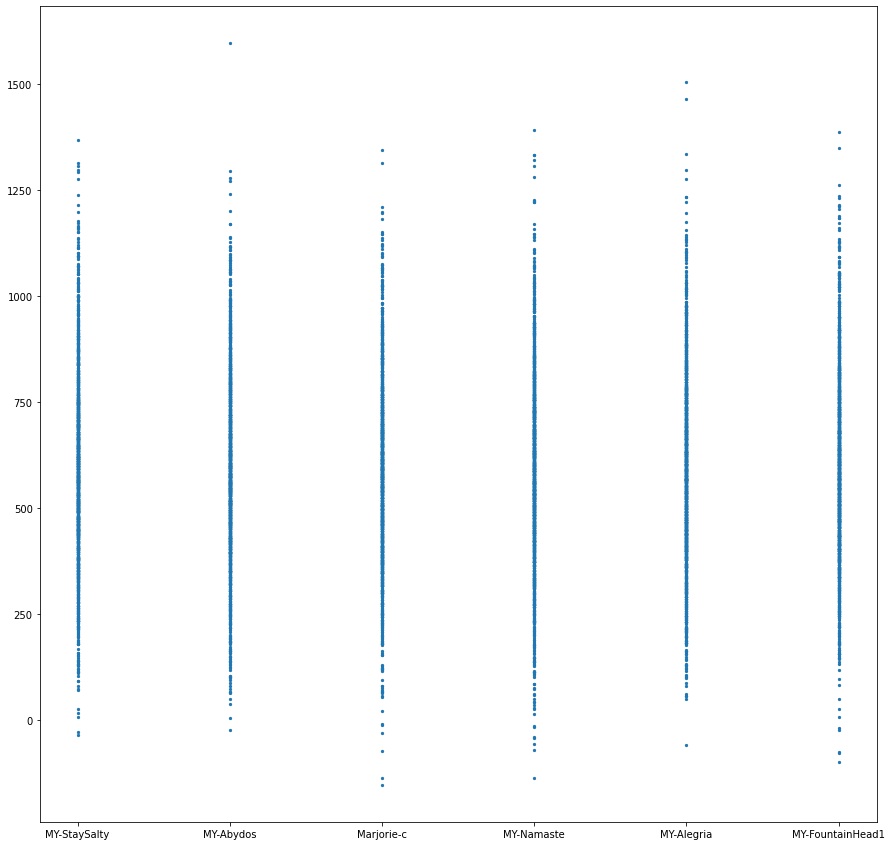

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(data.Terminal,data.Latency,s=5)
plt.show()

#Box Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


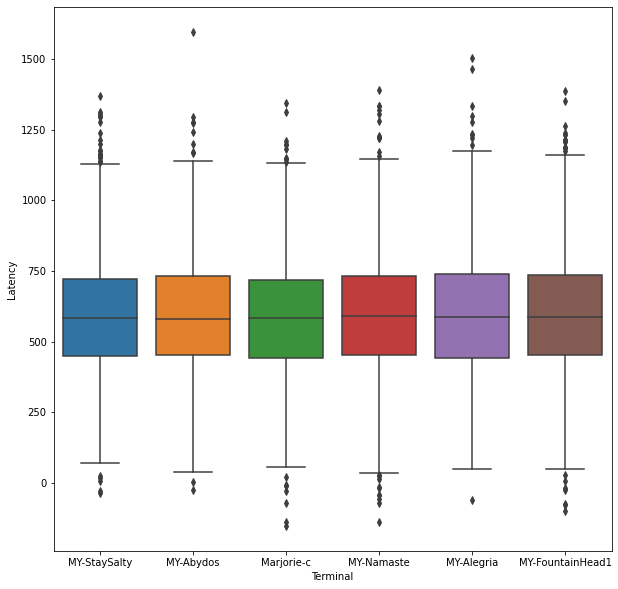

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data.Terminal, data.Latency)
plt.show()

# Counted no. of outliers per Terminal using IQR

In [ ]:
# https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/
def get_num_outliers (column):
 Q1 = np.percentile(column, 25, interpolation='midpoint')      # Q1 is the "middle" value in the first half of the rank-ordered data set.
 Q3 = np.percentile(column, 75, interpolation='midpoint')      # Q3 is the "middle" value in the second half of the rank-ordered data set.
 IQR = Q3-Q1
 return sum((column<Q1-1.5*IQR) | (column>Q3+1.5*IQR)) 

In [ ]:

data[['Terminal','Latency']].groupby('Terminal').agg([get_num_outliers])


,Latency
,get_num_outliers
Terminal,
MY-Abydos,10.0
MY-Alegria,10.0
MY-FountainHead1,20.0
MY-Namaste,22.0
MY-StaySalty,24.0
Marjorie-c,17.0


In [ ]:
df_namaste = data[data["Terminal"]=="MY-Namaste"]
df_namaste

,Unnamed: 0,timestamp,Terminal,Latency
4,4,01/10/2021 01:43,MY-Namaste,531.534196
5,5,01/10/2021 01:44,MY-Namaste,270.766791
18,18,01/10/2021 04:19,MY-Namaste,618.494887
20,20,01/10/2021 04:28,MY-Namaste,535.488906
21,21,01/10/2021 04:47,MY-Namaste,493.573523
...,...,...,...,...
9966,9966,21/01/2022 15:45,MY-Namaste,857.021367
9977,9977,21/01/2022 17:57,MY-Namaste,552.683224
9988,9988,21/01/2022 19:51,MY-Namaste,438.901059
9989,9989,21/01/2022 20:00,MY-Namaste,504.779906


In [ ]:
result_mul = seasonal_decompose(data['Latency'], model='multiplicative')

# Additive Decomposition
result_add = seasonal_decompose(data['Latency'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

AttributeError: ignored